<div align="center">

## BIKE RENTAL ANALYSIS - DATA CLEANING AND PREPARATION

</div>

**Necessary libriaries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

**Uploading data to pandas - CSV file**

In [2]:
df = pd.read_csv(r"C:\Users\Z004RMER\Desktop\PROJECT_BIKE_RENTAL\data\day.csv")

**Checking if any outliers occurs**

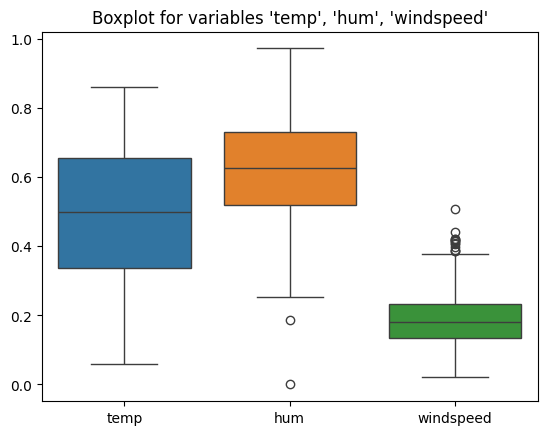

In [3]:
sns.boxplot(data=df[['temp', 'hum', 'windspeed']])
plt.title("Boxplot for variables 'temp', 'hum', 'windspeed'")
plt.show()

It's visible that 'hum' & 'windspeed' conatins some values which are outliers. I will replace outlier values with average values for specific column. 

**Replacing outliers with average values by setting ranges for variable as 99% of percetile**

In [4]:
def replace_outliers_percentile(df, column, lower=0.05, upper=0.95):
    lower_bound = df[column].quantile(lower)
    upper_bound = df[column].quantile(upper)
    mean_value = df[column].mean()
    
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound),
                          mean_value,
                          df[column])
    return df

# Apply to 'windspeed'
df = replace_outliers_percentile(df, 'windspeed')
df = replace_outliers_percentile(df, 'hum')

**Validation via boxplot if function responsible for replacing outliers works properly.**

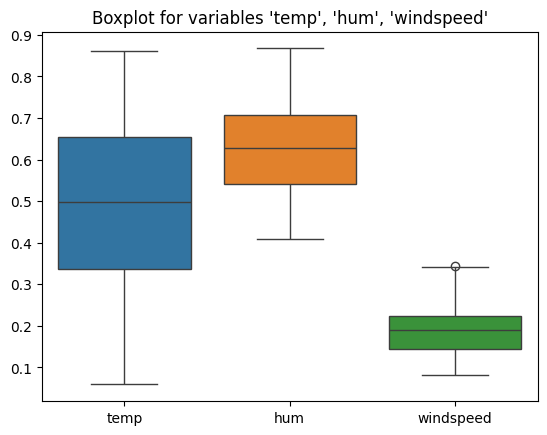

In [5]:
sns.boxplot(data=df[['temp', 'hum', 'windspeed']])
plt.title("Boxplot for variables 'temp', 'hum', 'windspeed'")
plt.show()

As we see on boxplot there are no longer any outliers for those 3 variables.

**For better analysis, more meaningful charts, and better data readability, we will replace numeric values for descriptive categories.**


In [6]:
df['season'] = df['season'].astype(int)
df['season'] = df['season'].map({2: 'spring', 3: 'summer', 4: 'fall', 1: 'winter'})
df['mnth'] = df['mnth'].astype(int)
df['mnth'] = df['mnth'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})
df['holiday'] = df['holiday'].astype(int)
df['holiday'] = df['holiday'].map({0: 'No',1: 'Yes'})
df['weathersit'] = df['weathersit'].astype(int)
df['weathersit'] = df['weathersit'].map({1: 'Clear', 2: 'Mist/Cloudy', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'})
df['weekdayt'] = df['weekday'].astype(int)
df['weekday'] = df['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekdayt
0,1,2011-01-01,winter,0,January,No,Saturday,0,Mist/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,6
1,2,2011-01-02,winter,0,January,No,Sunday,0,Mist/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801,0
2,3,2011-01-03,winter,0,January,No,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1
3,4,2011-01-04,winter,0,January,No,Tuesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2
4,5,2011-01-05,winter,0,January,No,Wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600,3


**Creation of 3 extra columns which will be helpful during analysis, plots interpretation and modeling. New columns will be**:
- is_weekend ==> based on column weekday
- temp_celsius ==> current values of temperature multiply by 41
- season_encoded ==> changeing on numeric encoded values. Aim is to keep both numeric and descriptive values because we will use it in different scenarios. 

In [10]:
#Creation of 'is_weeknd' column
df['is_weekend'] = df['weekday'].isin(['Saturday', 'Sunday'])
#Creation of 'temp' column
df['temp_celsius'] = df['temp'] * 41
#Creation of 'season_encoded' column
season_encoded = pd.get_dummies(df['season'], prefix='season')
df = pd.concat([df, season_encoded], axis=1)
#Creation of 'weathersit_encoded' column
df['weathersit_encoded'] = df['weathersit'].map({'Clear': 0, 'Mist/Cloudy': 1, 'Light Rain/Snow': 2})


df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,season_winter,season_fall,season_spring,season_summer,season_winter,weathersit_encoded,season_fall,season_spring,season_summer,season_winter
0,winter,0,January,No,Saturday,0,Mist/Cloudy,0.344167,0.363625,0.805833,...,True,False,False,False,True,1,False,False,False,True
1,winter,0,January,No,Sunday,0,Mist/Cloudy,0.363478,0.353739,0.696087,...,True,False,False,False,True,1,False,False,False,True
2,winter,0,January,No,Monday,1,Clear,0.196364,0.189405,0.437273,...,True,False,False,False,True,0,False,False,False,True
3,winter,0,January,No,Tuesday,1,Clear,0.200000,0.212122,0.590435,...,True,False,False,False,True,0,False,False,False,True
4,winter,0,January,No,Wednesday,1,Clear,0.226957,0.229270,0.436957,...,True,False,False,False,True,0,False,False,False,True


**Removing from df not necessary columns like: 'instant', 'dteday'**

In [11]:
df.drop(['instant', 'dteday'], axis = 1, inplace=True)
df.head()

KeyError: "['instant' 'dteday'] not found in axis"

**Saving dataframe to new CSV**

In [12]:
df.to_csv('cleaned_day_data_v2.csv', index=False)


**Creating line plot based on transformed column weekday**

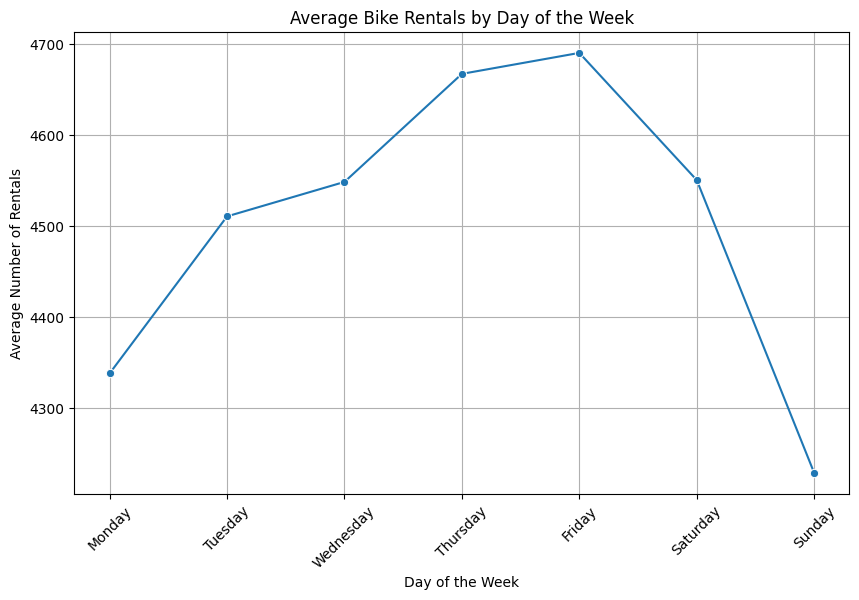

In [15]:
avg_by_weekday = df.groupby('weekday')['cnt'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Tworzenie wykresu liniowego
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_by_weekday, marker='o')
plt.title("Average Bike Rentals by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Number of Rentals")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()